<a href="https://colab.research.google.com/github/HarshitaAgar/Netflix_project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Car_sales.csv')

In [ ]:
df


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011


In [ ]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

In [ ]:
df.isna().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,36
Vehicle_type,0
Price_in_thousands,2
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1


In [ ]:
157*0.3

47.1

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,0
Vehicle_type,0
Price_in_thousands,0
Engine_size,0
Horsepower,0
Wheelbase,0
Width,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch'],
      dtype='object')

In [ ]:
df.rename(columns={'__year_resale_value':'year_resale_value'}, inplace=True)

<ipython-input-30-db53ac44d486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'__year_resale_value':'year_resale_value'}, inplace=True)


In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', ' year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df.head(2)

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011


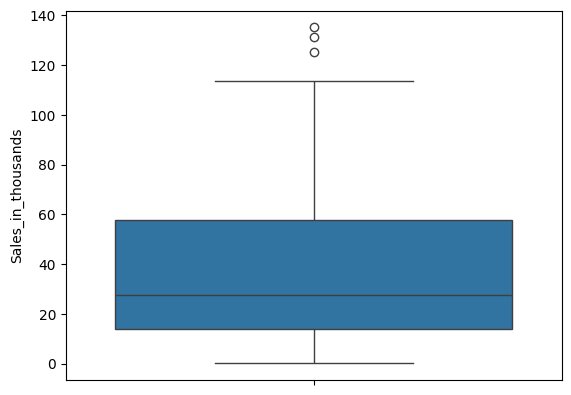

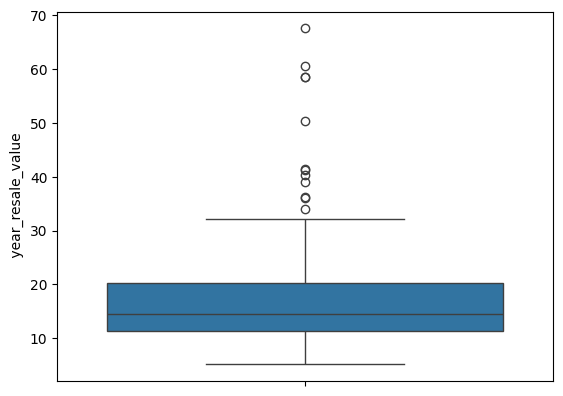

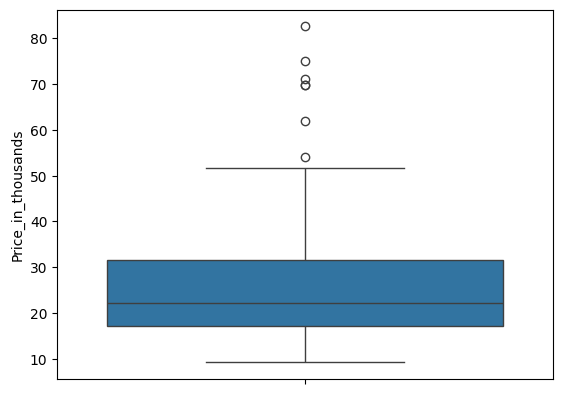

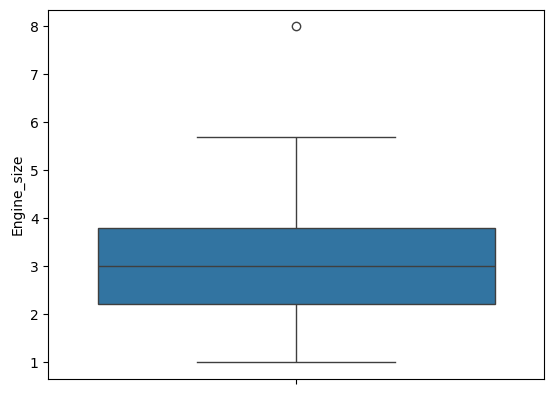

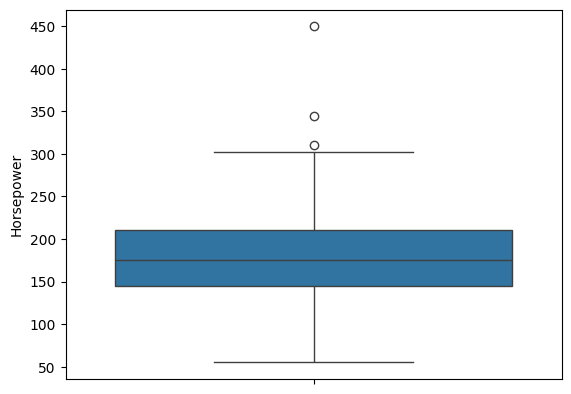

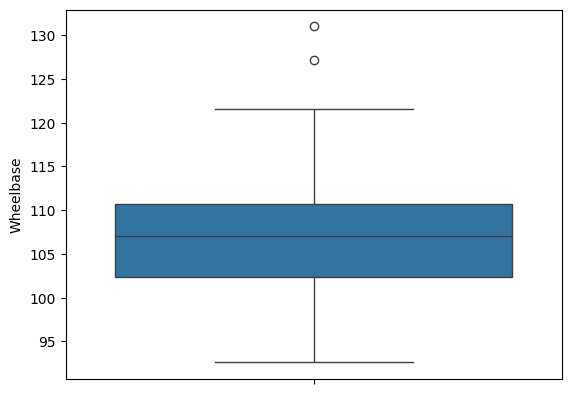

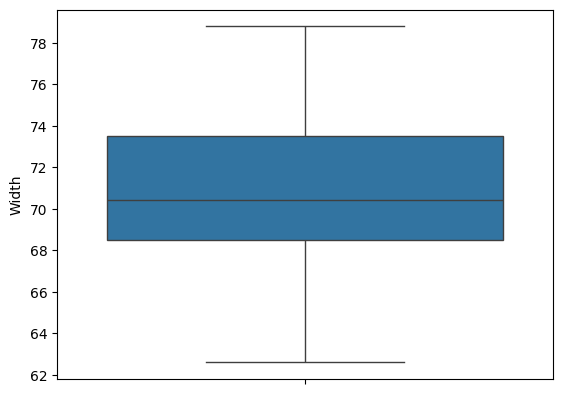

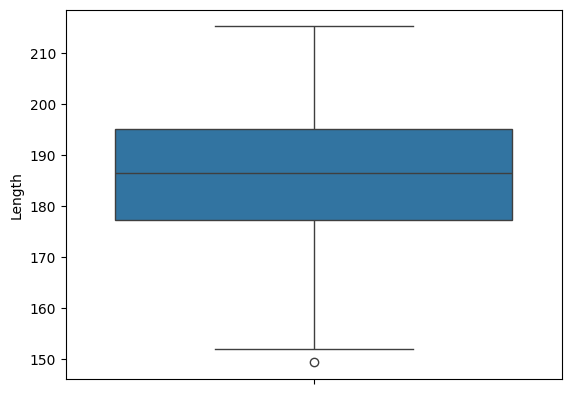

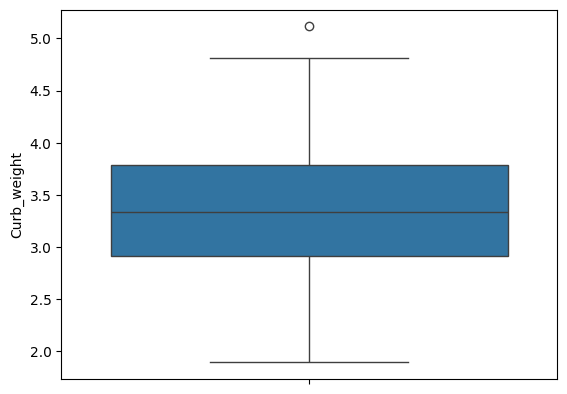

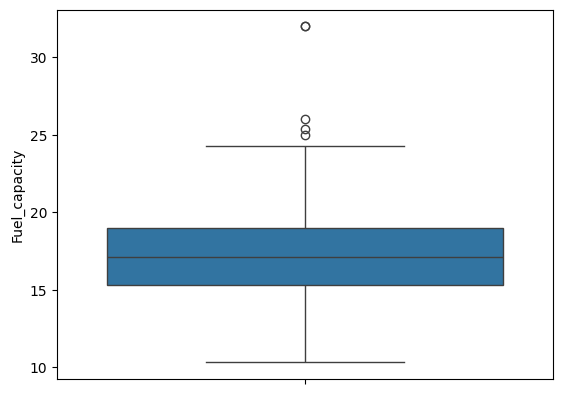

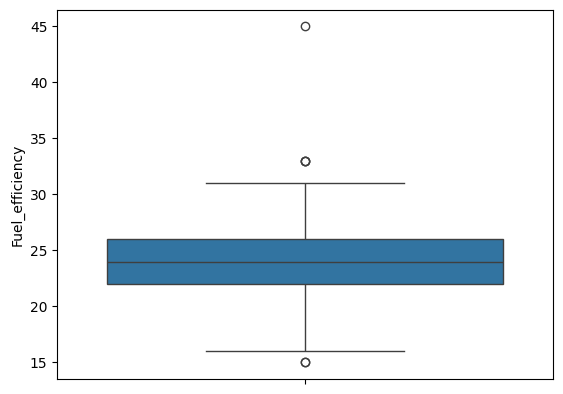

In [ ]:
for i in df.columns:
  if df[i].dtypes!='object':
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 149
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        104 non-null    object 
 1   Model               104 non-null    object 
 2   Sales_in_thousands  104 non-null    float64
 3    year_resale_value  104 non-null    float64
 4   Vehicle_type        104 non-null    object 
 5   Price_in_thousands  104 non-null    float64
 6   Engine_size         104 non-null    float64
 7   Horsepower          104 non-null    float64
 8   Wheelbase           104 non-null    float64
 9   Width               104 non-null    float64
 10  Length              104 non-null    float64
 11  Curb_weight         104 non-null    float64
 12  Fuel_capacity       104 non-null    float64
 13  Fuel_efficiency     104 non-null    float64
 14  Latest_Launch       104 non-null    object 
dtypes: float64(11), object(4)
memory usage: 17.1+ KB


In [ ]:
col = ['Sales_in_thousands', ' year_resale_value', 'Price_in_thousands', 'Engine_size','Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency']

In [ ]:
for i in col:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3+1.5*IQR
  lower = Q1-1.5*IQR

  df = df[(df[i]>lower) & (df[i]<upper)]

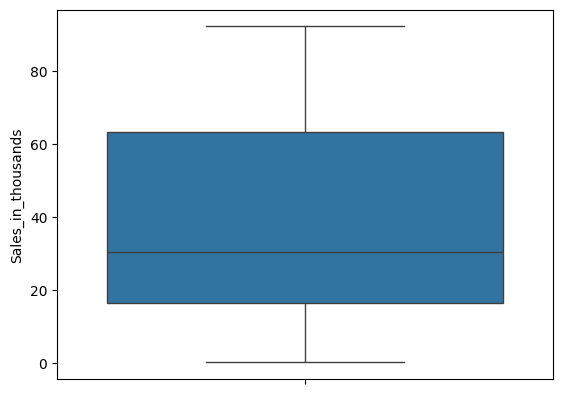

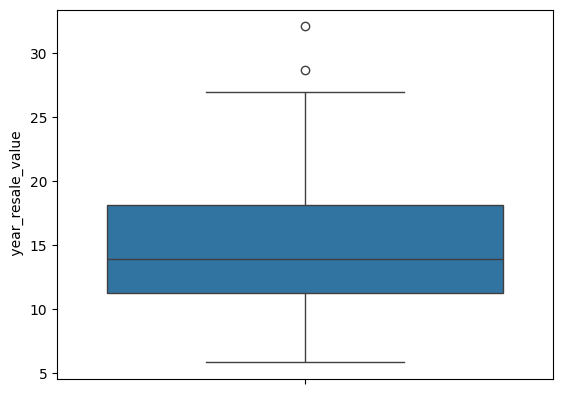

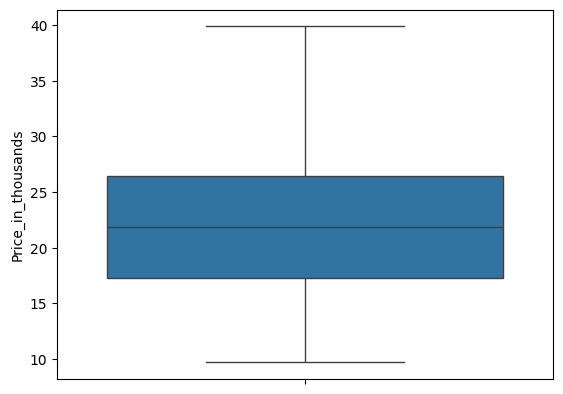

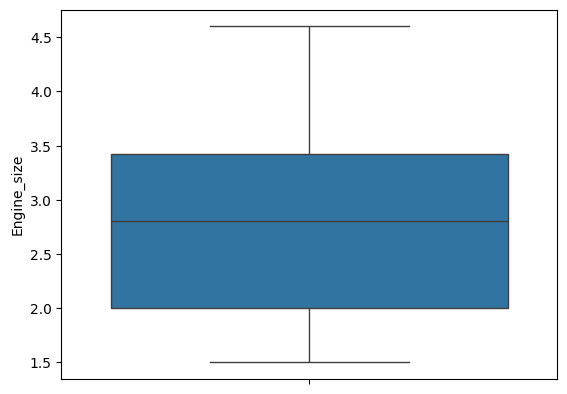

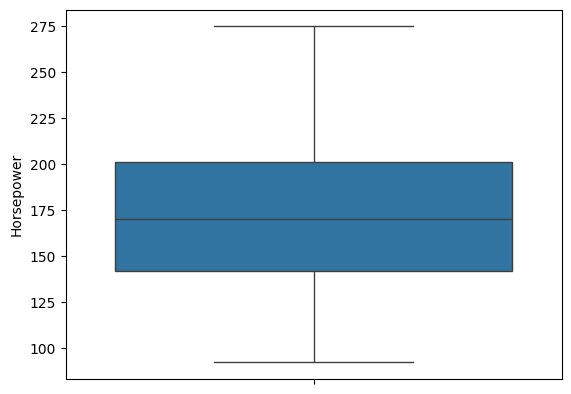

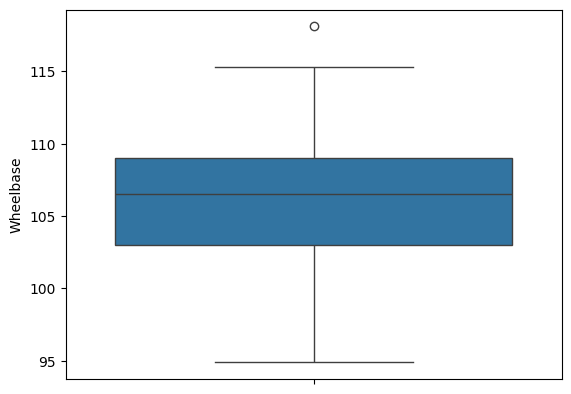

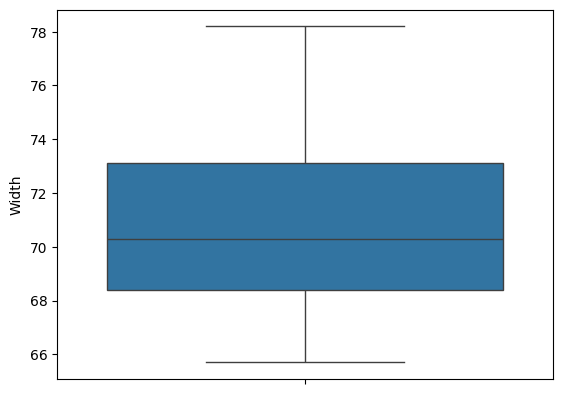

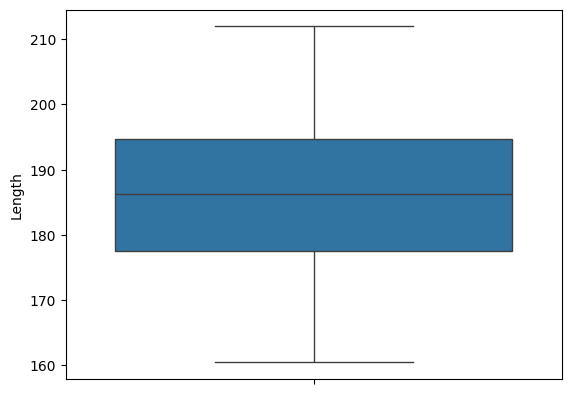

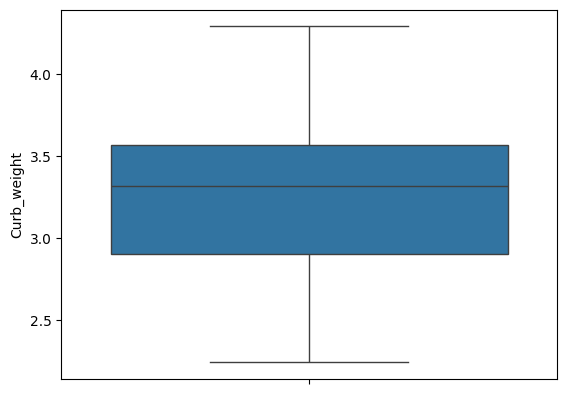

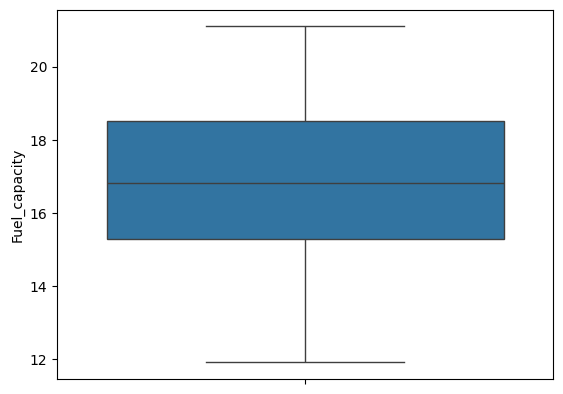

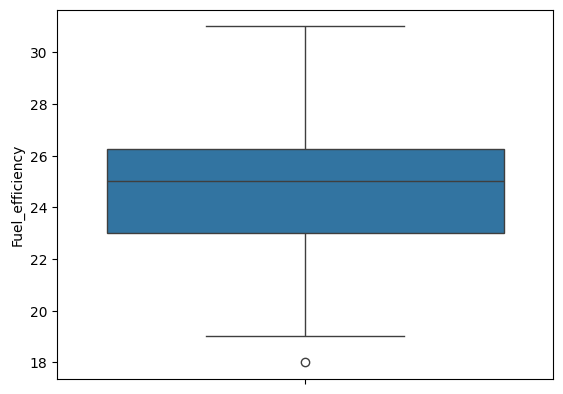

In [ ]:
for i in df.columns:
  if df[i].dtypes!='object':
    sns.boxplot(df[i])
    plt.show()

In [ ]:
#Model Building

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', ' year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch'],
      dtype='object')

In [ ]:
X = df['Horsepower']  #indp. var
Y = df['Fuel_efficiency']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=35)

In [ ]:
x_train.head(5)

,Horsepower
30,200.0
102,155.0
79,113.0
148,115.0
8,193.0


In [ ]:
y_train.shape

(53,)

In [ ]:
x_test.shape

(23,)

In [ ]:
y_test.shape

(23,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [ ]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [ ]:
from sklearn.metrics import  r2_score

In [ ]:
r2_score(y_pred, y_test)

-0.7278250170424407

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 149
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        76 non-null     object 
 1   Model               76 non-null     object 
 2   Sales_in_thousands  76 non-null     float64
 3    year_resale_value  76 non-null     float64
 4   Vehicle_type        76 non-null     object 
 5   Price_in_thousands  76 non-null     float64
 6   Engine_size         76 non-null     float64
 7   Horsepower          76 non-null     float64
 8   Wheelbase           76 non-null     float64
 9   Width               76 non-null     float64
 10  Length              76 non-null     float64
 11  Curb_weight         76 non-null     float64
 12  Fuel_capacity       76 non-null     float64
 13  Fuel_efficiency     76 non-null     float64
 14  Latest_Launch       76 non-null     object 
dtypes: float64(11), object(4)
memory usage: 9.5+ KB


In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', ' year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch'],
      dtype='object')

In [ ]:
df["Manufacturer"] = le.fit_transform(df["Manufacturer"])
df["Model"] = le.fit_transform(df["Model"])
df["Vehicle_type"] = le.fit_transform(df["Vehicle_type"])
df["Latest_Launch"] = le.fit_transform(df["Latest_Launch"])

In [ ]:
df

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
0,0,43,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,26
1,0,71,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,48
4,1,3,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,12
5,1,4,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,61
8,2,1,9.231,28.675,1,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,24,39,9.761,11.425,1,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2
146,24,44,83.721,13.240,1,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,57
147,24,57,51.102,16.725,1,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,8
148,24,15,9.569,16.575,1,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,42


In [ ]:
df.corr()

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
Manufacturer,1.000000,0.054534,0.017712,-0.178478,-0.222637,-0.298660,-0.206450,-0.363117,-0.280301,-0.278392,-0.354187,-0.200656,-0.099395,0.100512,0.028214
Model,0.054534,1.000000,0.116989,-0.306588,-0.221433,-0.219700,-0.058802,-0.086293,0.135139,0.083521,0.038965,-0.015531,-0.017405,0.020378,-0.129982
Sales_in_thousands,0.017712,0.116989,1.000000,-0.282905,-0.122498,-0.221161,0.071006,-0.045703,0.118787,0.067026,0.068026,-0.011619,-0.020890,0.028964,0.048221
year_resale_value,-0.178478,-0.306588,-0.282905,1.000000,-0.084542,0.868092,0.415999,0.622818,0.306899,0.187761,0.245715,0.576705,0.570602,-0.473923,0.058857
Vehicle_type,-0.222637,-0.221433,-0.122498,-0.084542,1.000000,-0.031701,-0.138625,0.021533,-0.103138,0.049247,0.165270,-0.328653,-0.428024,0.502741,0.003649
Price_in_thousands,-0.298660,-0.219700,-0.221161,0.868092,-0.031701,1.000000,0.690495,0.858999,0.516811,0.411096,0.529295,0.776219,0.692249,-0.620826,0.142469
Engine_size,-0.206450,-0.058802,0.071006,0.415999,-0.138625,0.690495,1.000000,0.839050,0.636894,0.647983,0.732897,0.839488,0.726315,-0.725550,0.210615
Horsepower,-0.363117,-0.086293,-0.045703,0.622818,0.021533,0.858999,0.839050,1.000000,0.660637,0.571005,0.736551,0.779899,0.704150,-0.612550,0.181407
Wheelbase,-0.280301,0.135139,0.118787,0.306899,-0.103138,0.516811,0.636894,0.660637,1.000000,0.719939,0.827048,0.754842,0.621564,-0.466095,0.061436
Width,-0.278392,0.083521,0.067026,0.187761,0.049247,0.411096,0.647983,0.571005,0.719939,1.000000,0.750765,0.654605,0.529378,-0.391625,0.136694


<Axes: >

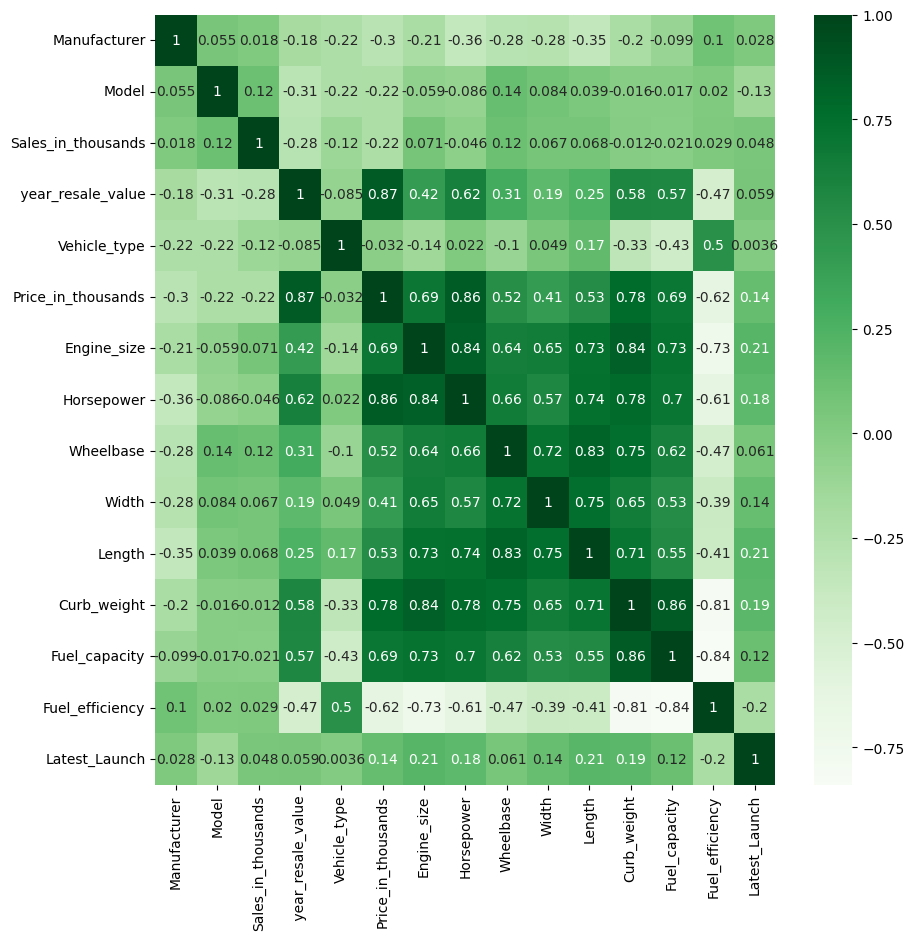

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap="Greens")

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', ' year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch'],
      dtype='object')

In [ ]:
X = df[["Manufacturer","Model","Sales_in_thousands","Vehicle_type","Latest_Launch"]]

In [ ]:
Y = df["Fuel_efficiency"]

In [ ]:
X

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Latest_Launch
0,0,43,16.919,1,26
1,0,71,39.384,1,48
4,1,3,20.397,1,12
5,1,4,18.780,1,61
8,2,1,9.231,1,4
...,...,...,...,...,...
145,24,39,9.761,1,2
146,24,44,83.721,1,57
147,24,57,51.102,1,8
148,24,15,9.569,1,42


In [ ]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=211)

In [ ]:
X_train.shape

(53, 5)

In [ ]:
Y_train.shape

(53,)

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_Predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import *

In [ ]:
r2_score(Y_test,y_Predict)

0.399521054570634

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(Y_test, y_Predict))

np.float64(2.177736218168807)

In [ ]:
y_Predict

array([25.8996782 , 24.52021359, 27.43942387, 21.7088846 , 26.56393741,
       25.29738437, 25.37184864, 26.79407677, 23.914394  , 21.19511312,
       27.34792962, 25.08663061, 25.96459723, 25.64543805, 20.92746383,
       25.0615925 , 24.92469599, 26.3388901 , 25.63622432, 26.02499733,
       25.45234398, 26.11411454, 25.1988661 ])

In [ ]:
Y_test

,Fuel_efficiency
108,25.0
36,24.0
147,27.0
68,20.0
115,27.0
64,25.0
82,22.0
81,25.0
17,22.0
61,23.0


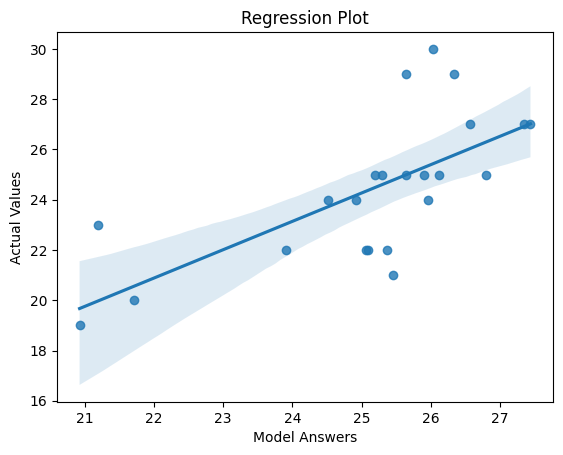

In [ ]:
sns.regplot(x=y_Predict,y=Y_test)
plt.title("Regression Plot")
plt.xlabel('Model Answers')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
dtypes: float64(11), object(4)
memory usage: 

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
dtypes: float64(11), object(4)
memory usage: 14.6+

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_in_thousands   117 non-null    float64
 1   __year_resale_value  117 non-null    float64
 2   Price_in_thousands   117 non-null    float64
 3   Engine_size          117 non-null    float64
 4   Horsepower           117 non-null    float64
 5   Wheelbase            117 non-null    float64
 6   Width                117 non-null    float64
 7   Length               117 non-null    float64
 8   Curb_weight          117 non-null    float64
 9   Fuel_capacity        117 non-null    float64
 10  Fuel_efficiency      117 non-null    float64
dtypes: float64(11)
memory usage: 11.0 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
col = ['Sales_in_thousands', '__year_resale_value',
       'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Fuel_capacity','Fuel_efficiency']

In [ ]:
for i in col:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  UF = Q3 + 1.5*IQR
  LF = Q1 - 1.5*IQR

  df = df[(df[i]>=LF) & (df[i]<=UF)]

In [ ]:
df.columns

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency'],
      dtype='object')

In [ ]:
X= df [["Sales_in_thousands","__year_resale_value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight"]]

In [ ]:
y = df["Fuel_efficiency"]

In [ ]:
model = LinearRegression()

In [ ]:
x_train,y_train,x_test,y_test = train_test_split(X,y, test_size=0.3, random_state=45)

ValueError: Found input variables with inconsistent numbers of samples: [56, 25]